In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
!ls /content/drive/MyDrive

 bot_detection_data.csv  'Getting started.pdf'	       'Pothole Detection.v2i.yolov8'
'Colab Notebooks'	  IMG_20240206_202909_334.jpg   Social_Network_Ads.csv
 GDToT			  loksabha2024_dataset.csv      Untitled0.ipynb


In [ ]:
!head /content/drive/MyDrive/bot_detection_data.csv

User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
132131,flong,Station activity person against natural majority none few size expect six marriage.,85,1,2353,0,1,Adkinston,11-05-2020 15:29,
289683,hinesstephanie,Authority research natural life material staff rate common protect attention.,55,5,9617,1,0,Sanderston,26-11-2022 05:18,both live
779715,roberttran,Manage whose quickly especially foot none to goal range case.,6,2,4363,1,0,Harrisonfurt,08-08-2022 03:16,phone ahead
696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,1,1,Martinezberg,14-08-2021 22:27,ever quickly new I
704441,noah87,Animal sign six data good or.,26,3,8438,0,1,Camachoville,13-04-2020 21:24,foreign mention
570928,james00,See wonder travel this suffer less yard office man certainly.,41,4,3792,1,1,West Cheyenne,07-05-2023 22:24,anyone respond perhaps market run
734182,leonard00,Door final sound my guess building rich.,54,0,10,1,0,Sou

In [ ]:
bot_detect_data = pd.read_csv('/content/drive/MyDrive/bot_detection_data.csv')
columns_to_keep = ['User ID', 'Retweet Count','Mention Count','Follower Count','Verified','Bot Label']
bot_data = bot_detect_data[columns_to_keep]

In [ ]:
bot_data.head()

,User ID,Retweet Count,Mention Count,Follower Count,Verified,Bot Label
0,132131,85,1,2353,0,1
1,289683,55,5,9617,1,0
2,779715,6,2,4363,1,0
3,696168,54,5,2242,1,1
4,704441,26,3,8438,0,1


In [ ]:
bot_data.tail()

,User ID,Retweet Count,Mention Count,Follower Count,Verified,Bot Label
49995,491196,64,0,9911,1,1
49996,739297,18,5,9900,0,1
49997,674475,43,3,6313,1,1
49998,167081,45,1,6343,0,0
49999,311204,91,4,4006,0,0


In [ ]:
bot_data.shape

(50000, 6)

In [ ]:
bot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   User ID         50000 non-null  int64
 1   Retweet Count   50000 non-null  int64
 2   Mention Count   50000 non-null  int64
 3   Follower Count  50000 non-null  int64
 4   Verified        50000 non-null  int64
 5   Bot Label       50000 non-null  int64
dtypes: int64(6)
memory usage: 2.3 MB


In [ ]:
bot_data.isnull().sum()

User ID           0
Retweet Count     0
Mention Count     0
Follower Count    0
Verified          0
Bot Label         0
dtype: int64

<Axes: xlabel='Bot Label', ylabel='count'>

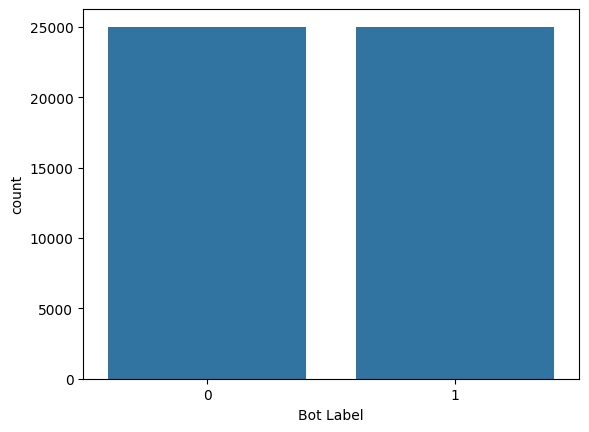

In [ ]:
sns.countplot(x='Bot Label', data=bot_data)

<ipython-input-113-9e101204cc46>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bot_data[col])
<ipython-input-113-9e101204cc46>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bot_data[col])
<ipython-input-113-9e101204cc46>:3: UserWarning: 

`distplot` is a deprecated function and will be rem

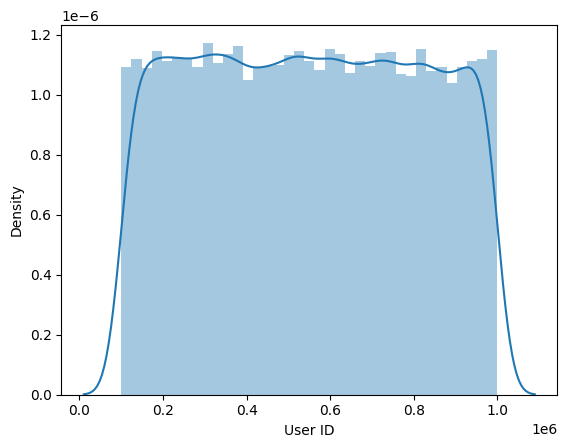

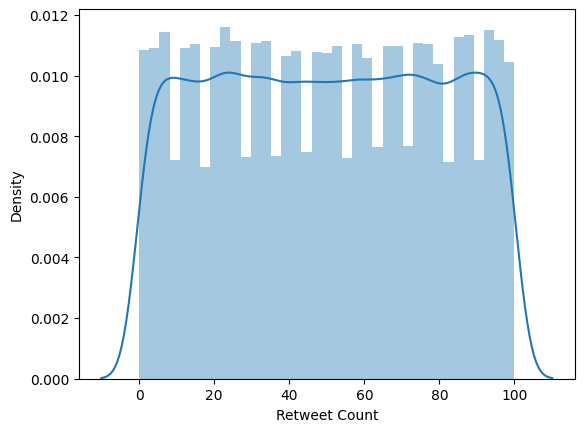

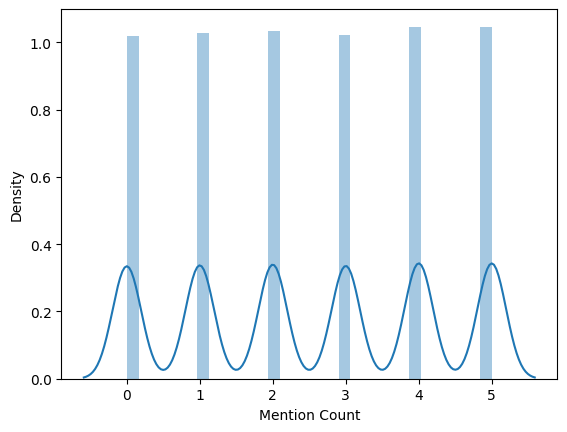

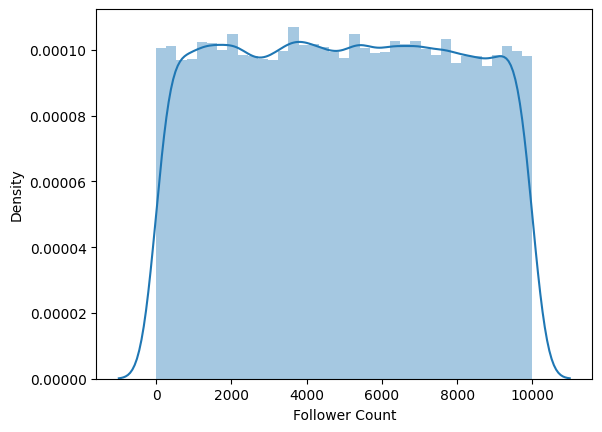

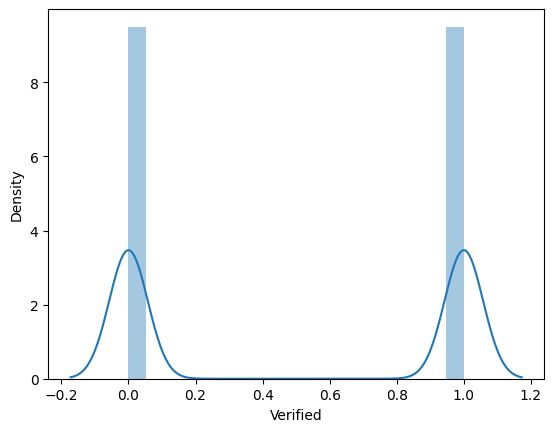

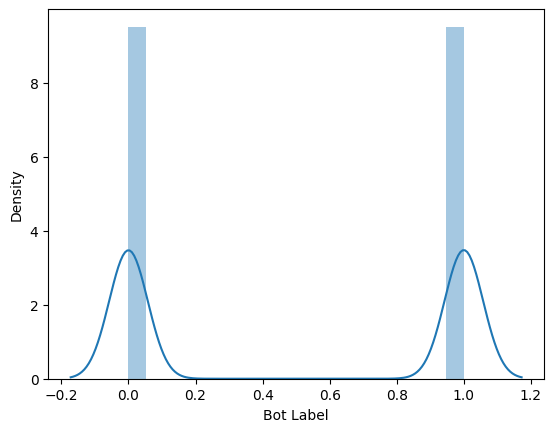

In [ ]:
for i, col in enumerate(bot_data.columns):
  plt.figure(i)
  sns.distplot(bot_data[col])

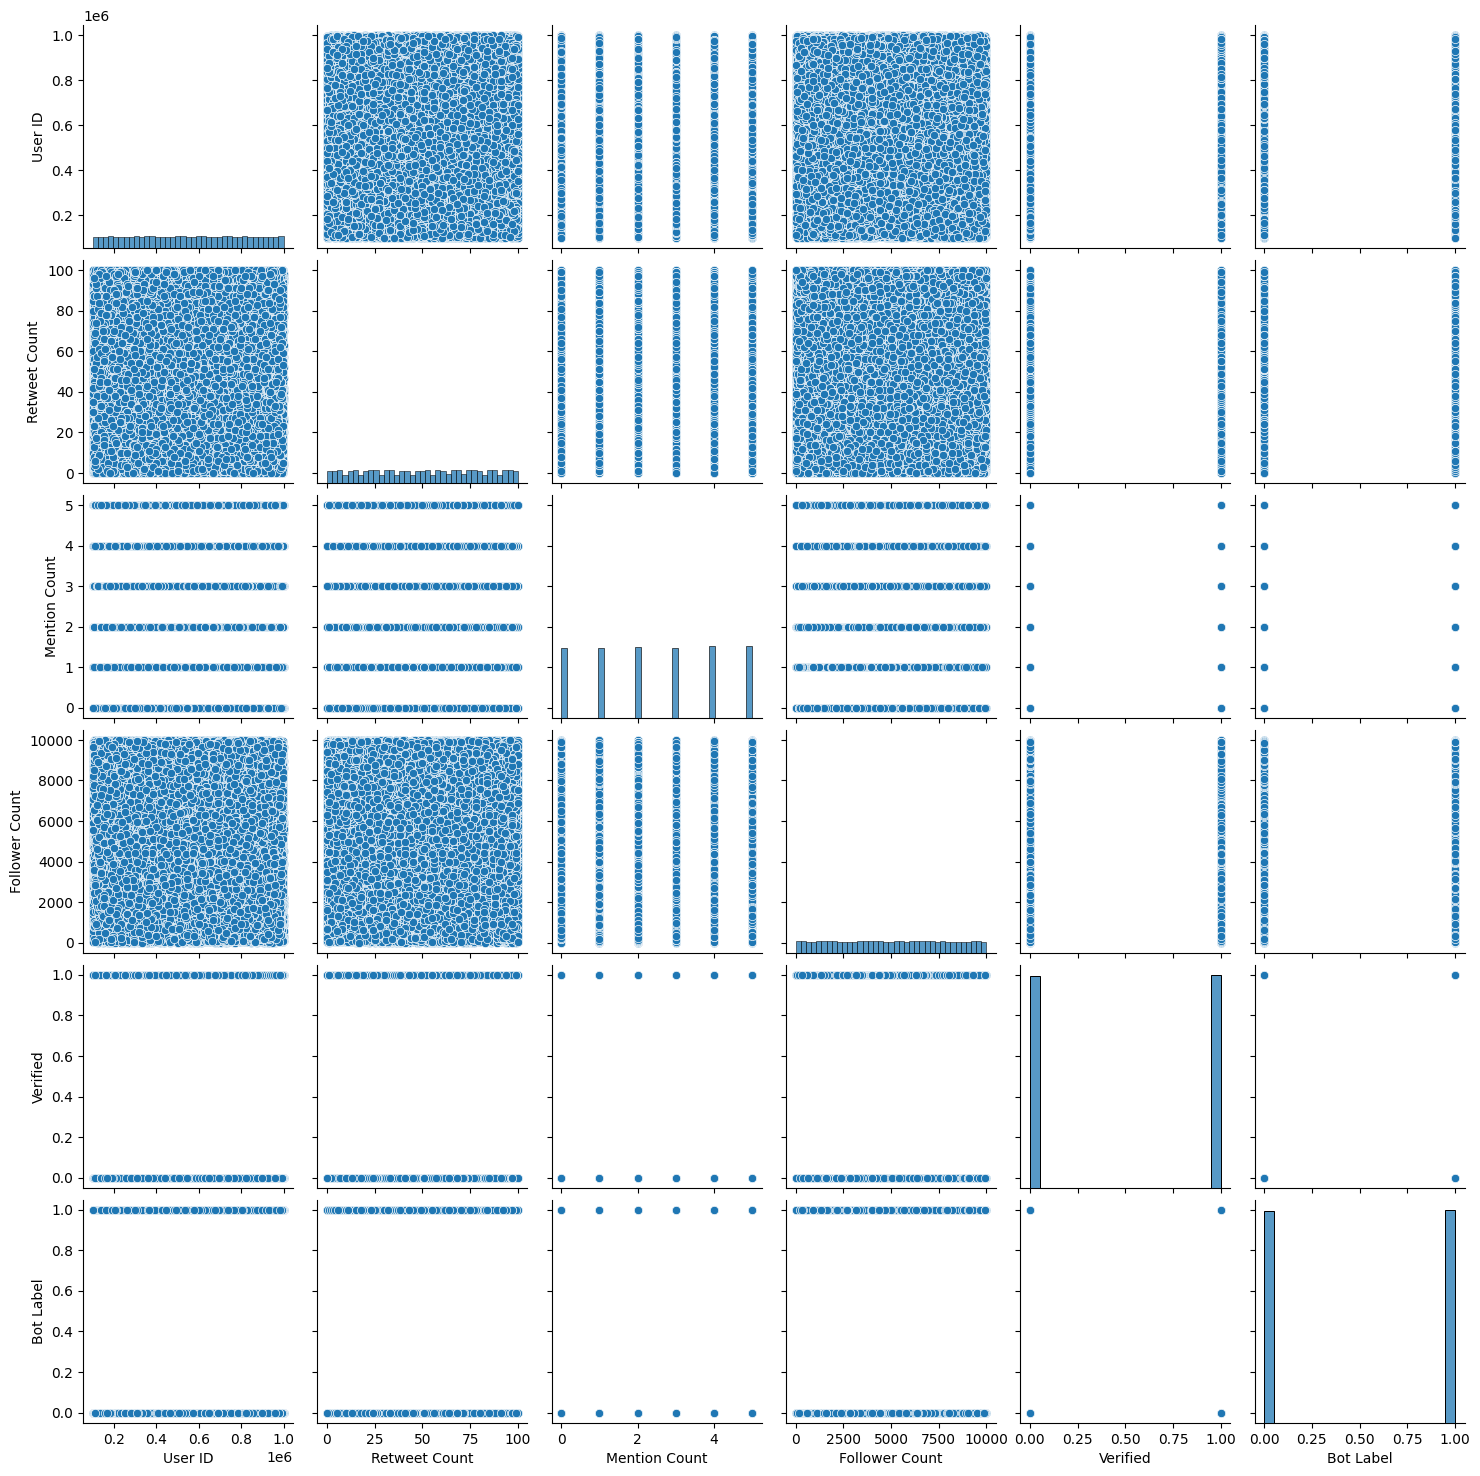

In [ ]:
sns.pairplot(bot_data)

In [ ]:
bot_data.corr()

,User ID,Retweet Count,Mention Count,Follower Count,Verified,Bot Label
User ID,1.000000,0.007776,0.007712,0.005580,0.005293,0.006059
Retweet Count,0.007776,1.000000,-0.000020,-0.007624,0.006486,0.001250
Mention Count,0.007712,-0.000020,1.000000,0.003265,0.006156,-0.006912
Follower Count,0.005580,-0.007624,0.003265,1.000000,0.000357,0.001162
Verified,0.005293,0.006486,0.006156,0.000357,1.000000,-0.002640
Bot Label,0.006059,0.001250,-0.006912,0.001162,-0.002640,1.000000


<Axes: >

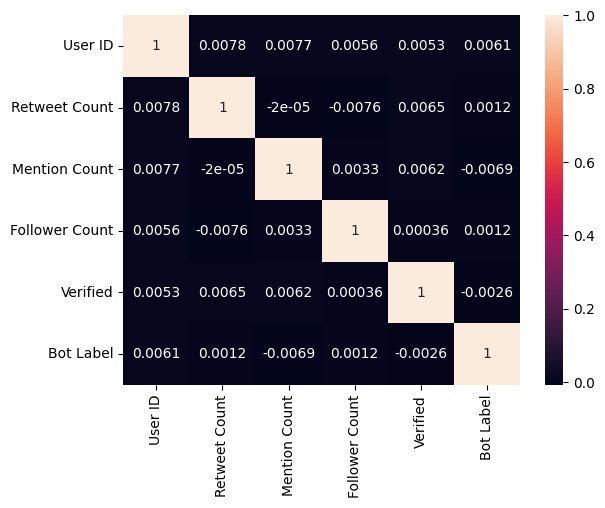

In [ ]:
sns.heatmap(bot_data.corr(),annot = True)

In [ ]:
bot_data.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Verified,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500080,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000,1.000000


In [ ]:
bot_data['Bot Label'].value_counts()

Bot Label
1    25018
0    24982
Name: count, dtype: int64

In [ ]:
X = bot_data.drop(columns='Bot Label', axis=1)
Y = bot_data['Bot Label']

In [ ]:
print(X)

       User ID  Retweet Count  Mention Count  Follower Count  Verified
0       132131             85              1            2353         0
1       289683             55              5            9617         1
2       779715              6              2            4363         1
3       696168             54              5            2242         1
4       704441             26              3            8438         0
...        ...            ...            ...             ...       ...
49995   491196             64              0            9911         1
49996   739297             18              5            9900         0
49997   674475             43              3            6313         1
49998   167081             45              1            6343         0
49999   311204             91              4            4006         0

[50000 rows x 5 columns]


In [ ]:
print(Y)

0        1
1        0
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    1
49998    0
49999    0
Name: Bot Label, Length: 50000, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 5) (40000, 5) (10000, 5)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.500525


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.5005


In [ ]:
input_data = (254875,55,7,5875,1)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('This User is NOT A BOT')
else:
  print('This User is a BOT ')

[0]
This User is NOT A BOT


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (145789,125,1,785,0)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('This User is NOT A BOT')
else:
  print('This User is a BOT ')

[1]
This User is a BOT 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
